# **Image Data Augmentation**


## 데이터가 부족한 세상으로 떠나기 위한 준비

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -O Batman.webp https://github.com/DrKAI/image/raw/main/Batman01.webp
# !wget -O Batman.jpg https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg

--2023-09-15 04:52:02--  https://github.com/DrKAI/image/raw/main/Batman01.webp
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp [following]
--2023-09-15 04:52:02--  https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281262 (275K) [image/webp]
Saving to: ‘Batman.webp’

Batman.webp         100%[===================>] 274.67K  --.-KB/s    in 0.04s   

2023-09-15 04:52:02 (7.26 MB/s) - ‘Batman.webp’ saved [281262/281262]



In [3]:
image_org = load_img("Batman.webp")
image = img_to_array(image_org)
image.shape  # height, width, channel

(1600, 1136, 3)

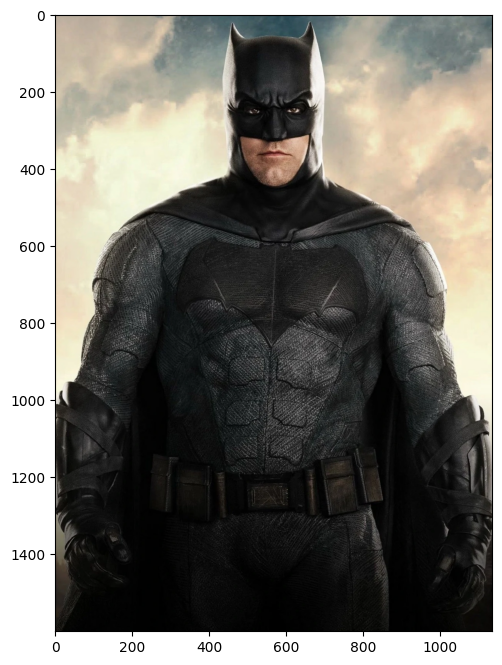

In [4]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [5]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [6]:
image.shape

(1, 1600, 1136, 3)

## **ImageDataGenerator**

- [**전체 옵션 참고**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
aug = ImageDataGenerator(rotation_range=50,      # 이미지 회전
                         width_shift_range=0.3,  # 이미지 좌우 이동
                         height_shift_range=0.3, # 이미지 상하 이동
                         zoom_range=0.8,         # 확대/축소 범위
                         shear_range=0.5,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [9]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg' )

In [10]:
!mkdir output

In [11]:
!ls output

In [12]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 20장 채우면 멈추자
    if total == 20:
        break

In [13]:
!ls output

image_0_1413.jpg  image_0_3849.jpg  image_0_5938.jpg  image_0_7785.jpg
image_0_1613.jpg  image_0_4359.jpg  image_0_6547.jpg  image_0_8178.jpg
image_0_1702.jpg  image_0_4907.jpg  image_0_6910.jpg  image_0_8789.jpg
image_0_2135.jpg  image_0_4986.jpg  image_0_6943.jpg  image_0_8991.jpg
image_0_228.jpg   image_0_5450.jpg  image_0_7248.jpg  image_0_9796.jpg


In [14]:
import os

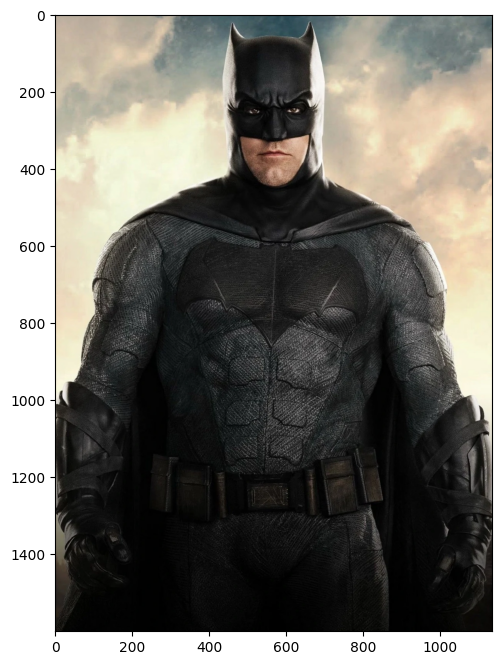

In [15]:
plt.figure(figsize=(12,8))
# plt.imshow(image)   # 차원 추가하여서 실행 X
plt.imshow(image_org)
plt.show()

In [16]:
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(10, 20))
output_files = os.listdir('output')

for idx, ax in enumerate(axes.flat):  # flatten한 axes에 대해 인덱스와 함께 순회
    img = plt.imread( './output/'+output_files[idx] )
    ax.imshow( img )
    ax.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.